<a href="https://colab.research.google.com/github/simonecaletti/beldum-prj/blob/main/analyses/Beldum_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table

This is a Python notebook for Pokémon VGC data analysis written by Simone Caletti (aka Manabu) and it is part of the Beldum project.

You can use this notebook to extract informations related to a VGC competition from a bunch of ETTs.

Upload a CSV database:

In [3]:
if os.path.exists("db.csv"):
  !rm db.csv
  
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(r'db.csv', error_bad_lines=False)
#print(df)

Saving db.csv to db.csv


If there are some **Skipping line**, this means that some data in the database are corrupted and they will be neglected. If they are not a lot they should not affect the statical validity of the analysis.

#USAGE ANALYSIS

In the plot here below we represented the "usage". All the Pokemons in the ETTs are considered, even if they appeared only once. 

Remove the hashtag to de-comment the last two lines of code. Doing this, when you run the cell the code will save automatically the plot locally on you pc.

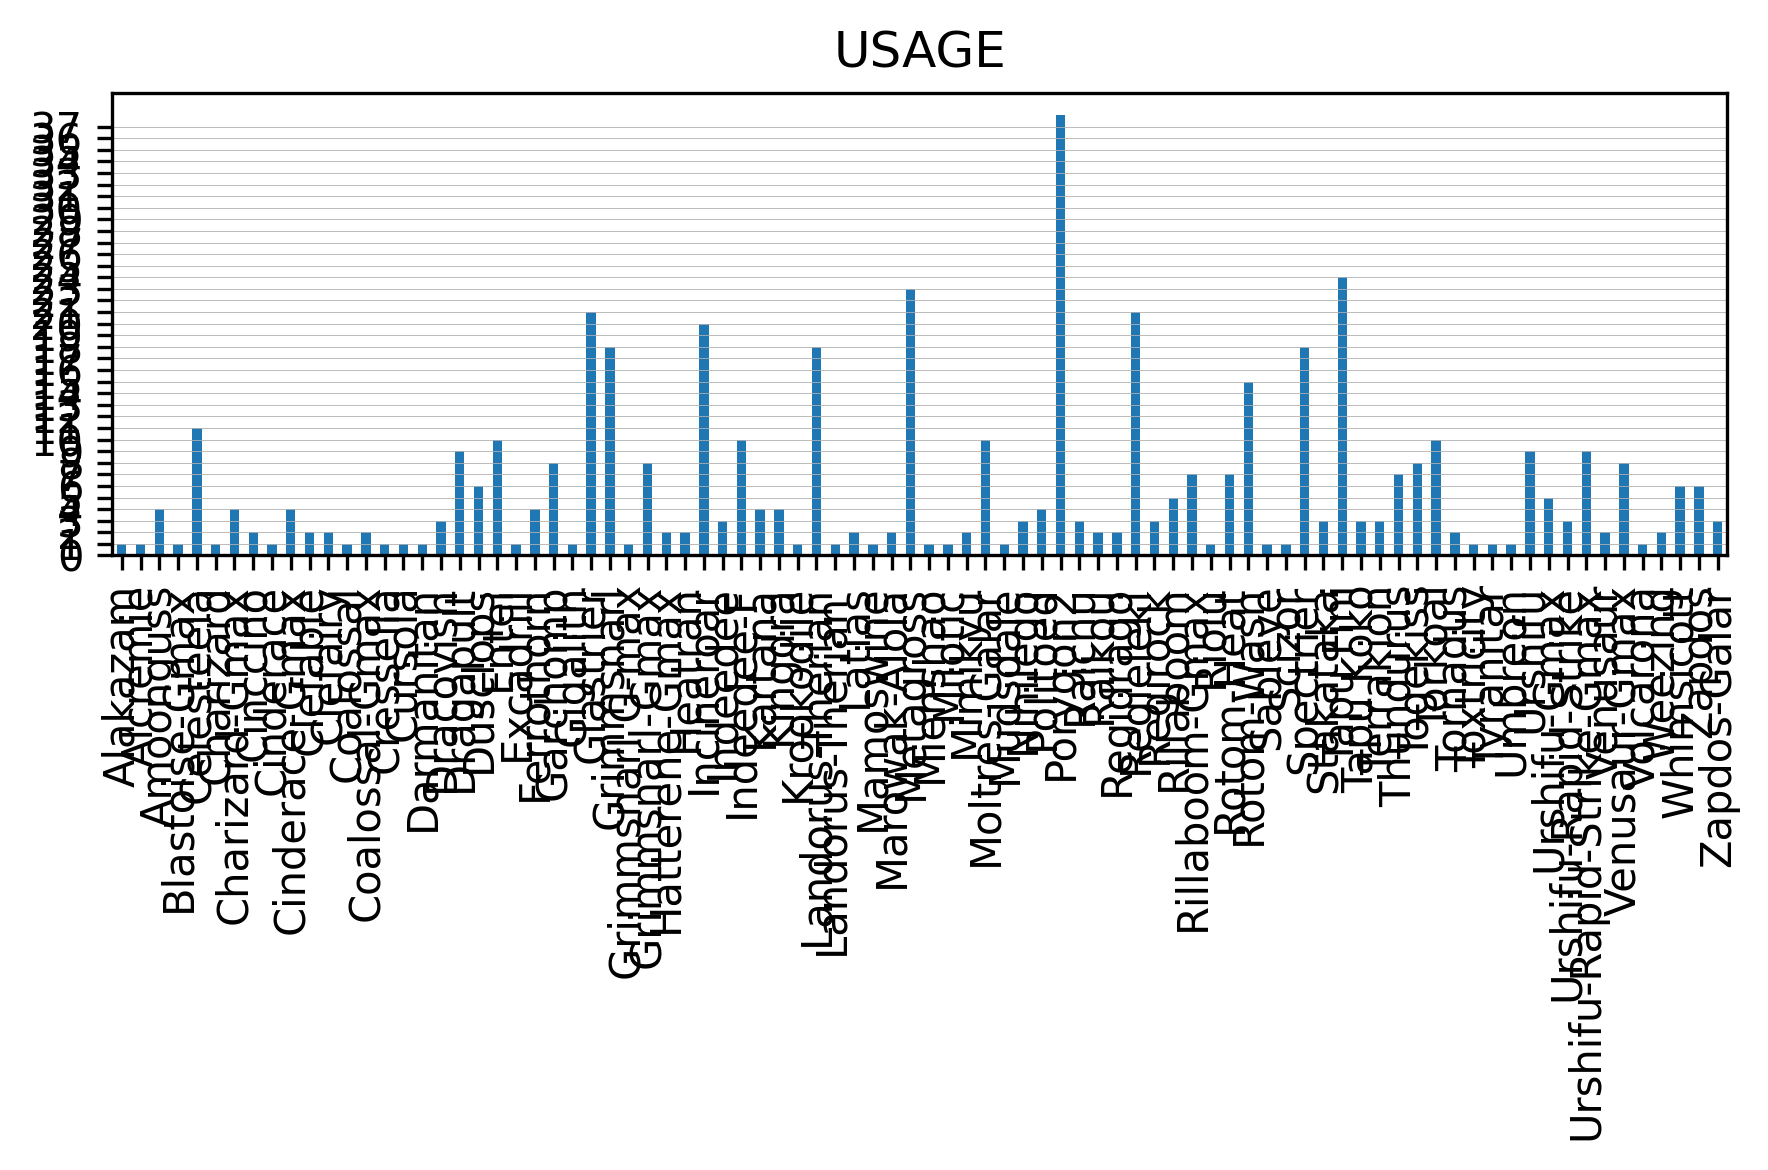

In [4]:
max = np.array(df.groupby("specie").size()).max()
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=300)
usage = df.groupby("specie").size().plot(kind="bar", ax=ax).get_figure()
ax.grid(axis="y", linewidth=0.2)
ax.set_yticks(range(max))
ax.set_xlabel("")
ax.set_title("USAGE")
plt.tight_layout()
#usage.savefig("usage.png")
#files.download("usage.png")

In the plot here below we have considere only the "top usage". Tune the N parameter to modify the top as you wish.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

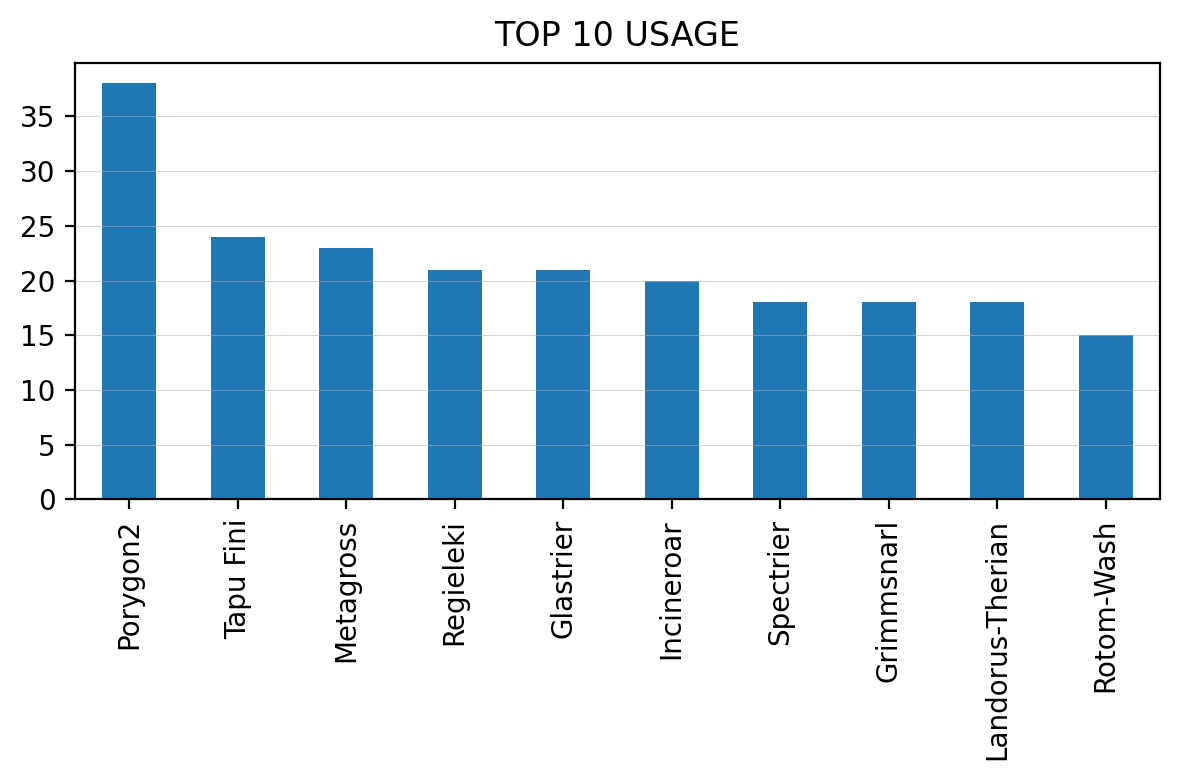

In [8]:
N = 10

max = np.array(df.groupby("specie").size()).max()
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=200)
usage = df["specie"].value_counts().head(N).plot(kind="bar", ax=ax).get_figure()
ax.grid(axis="y", linewidth=0.2)
ax.set_yticks(range(0, max + 1, 5))
ax.set_xlabel("")
ax.set_title("TOP 10 USAGE")#
plt.tight_layout()
usage.savefig("top_usage.png")
files.download("top_usage.png")

#TOP CORE ANALYSIS


Code here counts how many times a Pokemon is in the same team with another one. This couple is what we mention here as a "core".

In [9]:
cores1 = pd.Series(list(zip(df.specie, df.teammate1)))
cores2 = pd.Series(list(zip(df.specie, df.teammate2)))
cores3 = pd.Series(list(zip(df.specie, df.teammate3)))
cores4 = pd.Series(list(zip(df.specie, df.teammate4)))
cores5 = pd.Series(list(zip(df.specie, df.teammate5)))
df_core1 = cores1.value_counts().rename_axis("core").reset_index(name="counts")
df_core2 = cores2.value_counts().rename_axis("core").reset_index(name="counts")
df_core3 = cores3.value_counts().rename_axis("core").reset_index(name="counts")
df_core4 = cores4.value_counts().rename_axis("core").reset_index(name="counts")
df_core5 = cores5.value_counts().rename_axis("core").reset_index(name="counts")

dfs = [df_core1, df_core2, df_core3, df_core4, df_core5]
core_list = []
count_list = []
for df_core in dfs:
  for core, counts in zip(df_core.core, df_core.counts):
    eq_core = (core[1], core[0])
    if core in core_list:
      count_list[core_list.index(core)] += counts
    elif eq_core in core_list:
      count_list[core_list.index(eq_core)] += counts
    else:
      core_list.append(core)
      count_list.append(counts)
count_list = [int(x/2) for x  in count_list]
      
df_core = pd.DataFrame({"core" : core_list, "counts" : count_list}).sort_values(by="counts", ascending=False)
print(df_core)

                                      core  counts
2                    (Porygon2, Metagross)      17
5                   (Porygon2, Grimmsnarl)      13
1                  (Metagross, Grimmsnarl)      13
128                  (Porygon2, Tapu Fini)      11
286           (Landorus-Therian, Porygon2)      11
..                                     ...     ...
323              (Grimmsnarl-Gmax, Zapdos)       1
322  (Clefairy, Urshifu-Rapid-Strike-Gmax)       1
319                (Regidrago, Darmanitan)       1
631             (Rillaboom-Gmax, Togekiss)       1
627                        (Porygon2, nan)       0

[632 rows x 2 columns]


Here below the plot with N most popular cores. The user can tune N in the code below to change how many cores will be plotted.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

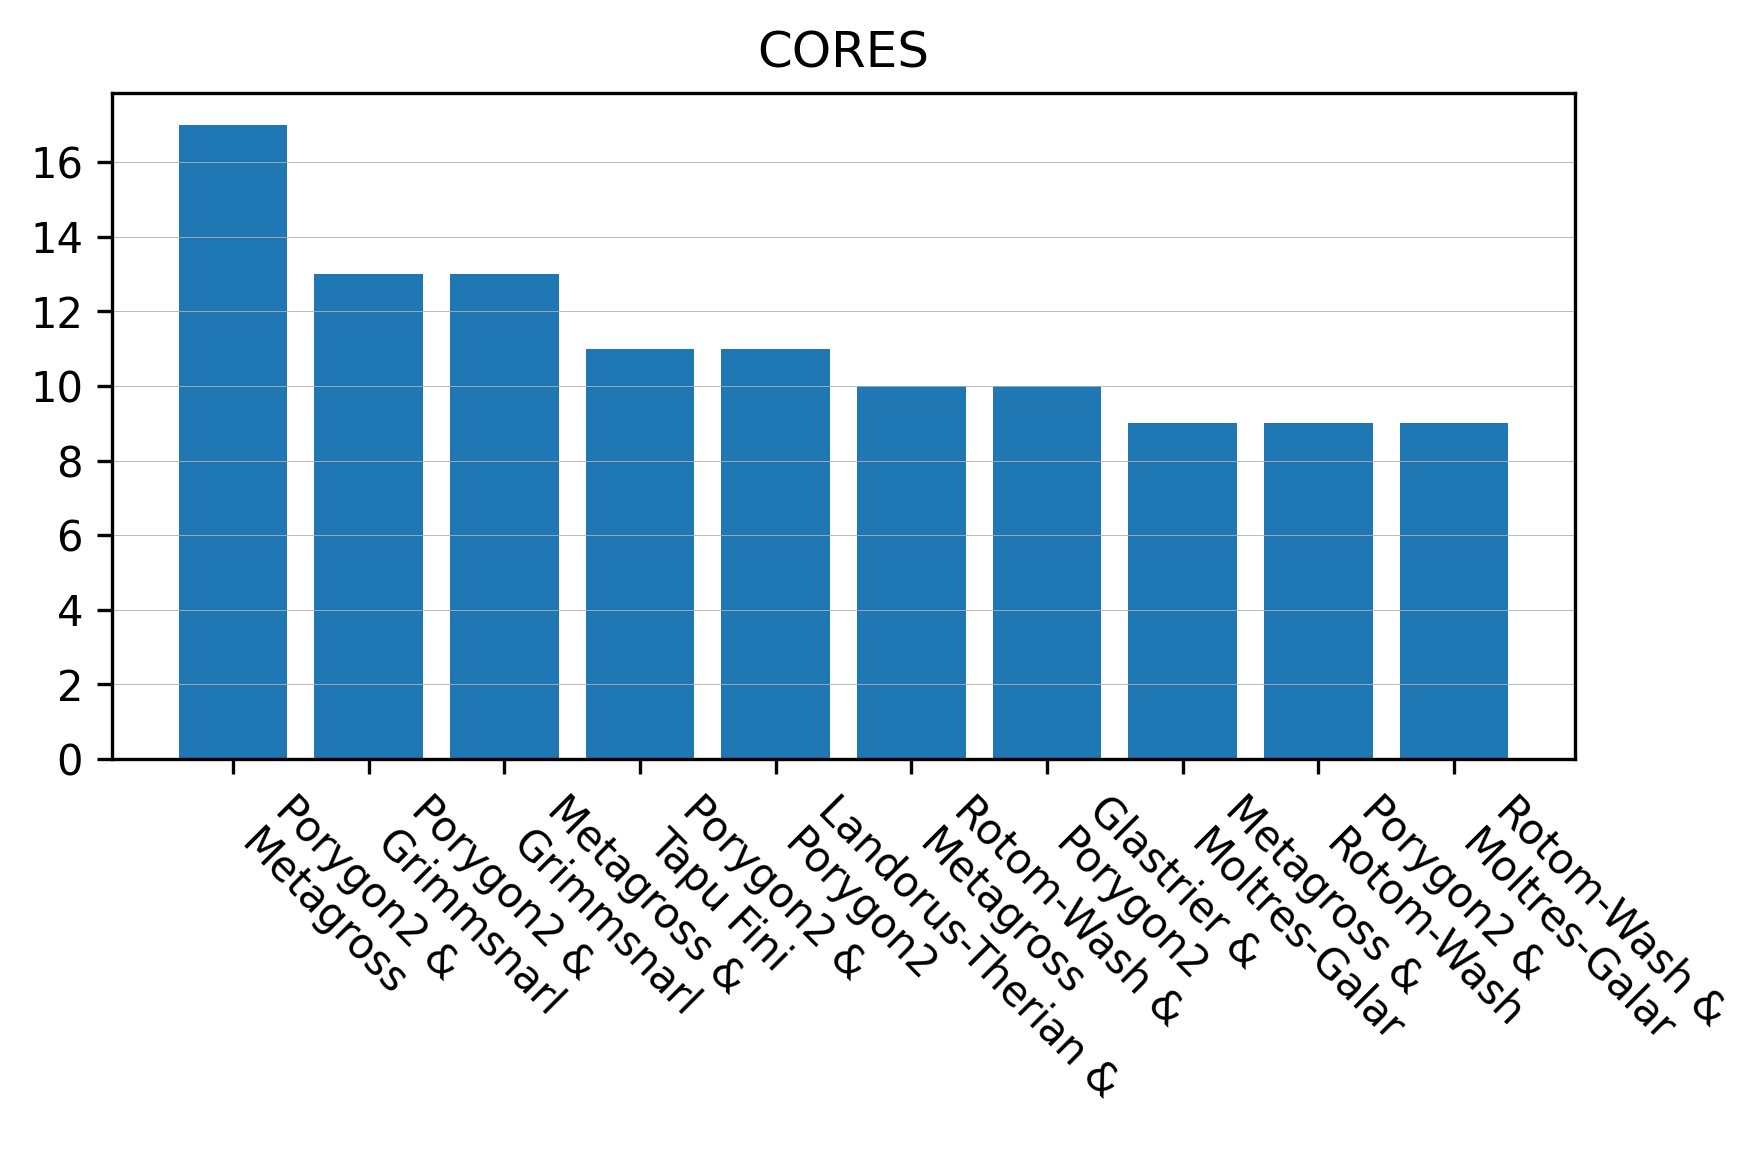

In [13]:
N = 10

xlist = df_core.head(N).core.to_list()
xlist = [str(x[0]) + " &\n" + str(x[1]) for x in xlist]
ylist = df_core.head(N).counts.to_list()
max = df_core.counts.max()

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=300)
ax.bar(xlist, ylist)
ax.grid(axis="y", linewidth=0.2)
ax.set_yticks(range(0, max + 1, 2))
ax.set_xlabel("")
ax.set_title("CORES")
plt.xticks(rotation=-45, ha="left")
plt.tight_layout()
fig.savefig("core.png")
files.download("core.png")

#SPECIFIC SET (Pikalytics like)

Here below we study a specific Pokémon of interest. All the different sets are described in the table here below.

Specify the Pokémon you want to study changing the "pkm" parameter.

The cells after this one are a sort of Pikalytics study of the usage of a selected Pokémon in the metagame and they can be runned independently. Just pay attention to run this first cell before because contains the specie of Pokémon considered in the analysis. 


In [ ]:
pkm = "Rillaboom"

df.groupby("specie").get_group(pkm)

,specie,obj,ability,HP,Atk,Def,SpA,SpD,Spe,nature,iv_HP,iv_Atk,iv_Def,iv_SpA,iv_SpD,iv_Spe,move1,move2,move3,move4,teammate1,teammate2,teammate3,teammate4,teammate5
12,Rillaboom,Expert Belt,Grassy Surge,0,252,252,0,4,0,Brave,31,31,31,31,31,0,Grassy Glide,Hammer Arm,High Horsepower,Protect,Duraludon,Hatterene,Copperajah,Dracozolt,Orbeetle
60,Rillaboom,Miracle Seed,Grassy Surge,252,252,0,0,4,0,Adamant,31,31,31,31,31,31,Wood Hammer,Grassy Glide,Grass Pledge,Protect,Cinderace,Inteleon,Corviknight,Boltund,Grimmsnarl
101,Rillaboom,Aguav Berry,Grassy Surge,252,252,0,0,4,0,Adamant,31,31,31,31,31,31,Grassy Glide,Knock Off,High Horsepower,Protect,Indeedee-F,Hatterene,Coalossal,Corviknight,Sirfetch’d
109,Rillaboom,Choice Band,Grassy Surge,4,252,0,0,0,252,Adamant,31,31,31,31,31,31,Superpower,Grassy Glide,High Horsepower,Knock Off,Cinderace,Duraludon,Indeedee,Hatterene,Corviknight
117,Rillaboom,Assault Vest,Grassy Surge,196,132,148,0,28,4,Adamant,31,31,31,31,31,31,Knock Off,Fake Out,Grassy Glide,U-turn,Duraludon,Indeedee-F,Stonjourner,Grimmsnarl,Dragapult
131,Rillaboom,Assault Vest,Grassy Surge,4,220,84,0,84,116,Serious,31,31,31,31,31,31,Grassy Glide,Earthquake,Knock Off,Wood Hammer,Grimmsnarl,Dubwool,Indeedee-F,Dragapult,Cinderace
137,Rillaboom,Miracle Seed,Grassy Surge,132,252,48,0,76,0,Brave,31,31,31,31,31,0,Fake Out,Grassy Glide,High Horsepower,Knock Off,Cinderace,Grimmsnarl,Duraludon,Darmanitan-Galar,Indeedee-F
142,Rillaboom,Miracle Seed,Grassy Surge,252,252,0,0,0,4,Adamant,31,31,31,31,31,31,Grassy Glide,Wood Hammer,Fake Out,Knock Off,Indeedee-F,Dragapult,Toxtricity-Gmax,Cinderace,Grimmsnarl
153,Rillaboom,Miracle Seed,Grassy Surge,252,252,0,0,0,4,Adamant,31,31,31,31,31,31,Grassy Glide,High Horsepower,Fake Out,Bulk Up,Grimmsnarl-Gmax,Cinderace,Inteleon,Duraludon,Coalossal-Gmax
156,Rillaboom,Miracle Seed,Grassy Surge,0,252,0,0,4,252,Adamant,31,31,31,31,31,31,Grassy Glide,Knock Off,High Horsepower,Protect,Eldegoss,Appletun,Frosmoth,Greedent,Alcremie


In [ ]:
attribs = ["obj", "ability", "nature"]
attribs_label = ["Object", "Ability", "Nature"]

df_obj = df.groupby("specie").get_group(pkm)[attribs[0]].value_counts().rename_axis(attribs[0]).reset_index(name="counts")
den = df_obj.counts.sum()
perc = round((df_obj.counts / den) * 100, 1)
pd.DataFrame({attribs_label[0] : df_obj[attribs[0]], "Percentage (%)" : perc})

,Object,Percentage (%)
0,Miracle Seed,46.7
1,Assault Vest,20.0
2,Grassy Seed,13.3
3,Expert Belt,6.7
4,Aguav Berry,6.7
5,Choice Band,6.7


In [ ]:
attribs = ["obj", "ability", "nature"]
attribs_label = ["Object", "Ability", "Nature"]

df_obj = df.groupby("specie").get_group(pkm)[attribs[1]].value_counts().rename_axis(attribs[1]).reset_index(name="counts")
den = df_obj.counts.sum()
perc = round((df_obj.counts / den) * 100, 1)
pd.DataFrame({attribs_label[1] : df_obj[attribs[1]], "Percentage (%)" : perc})

,Ability,Percentage (%)
0,Grassy Surge,100.0


In [ ]:
attribs = ["obj", "ability", "nature"]
attribs_label = ["Object", "Ability", "Nature"]

df_obj = df.groupby("specie").get_group(pkm)[attribs[2]].value_counts().rename_axis(attribs[2]).reset_index(name="counts")
den = df_obj.counts.sum()
perc = round((df_obj.counts / den) * 100, 1)
pd.DataFrame({attribs_label[2] : df_obj[attribs[2]], "Percentage (%)" : perc})

,Nature,Percentage (%)
0,Adamant,60.0
1,Brave,33.3
2,Serious,6.7


In [ ]:
df_tm1 = df.groupby("specie").get_group(pkm).teammate1
df_tm2 = df.groupby("specie").get_group(pkm).teammate2.append(df_tm1)
df_tm3 = df.groupby("specie").get_group(pkm).teammate3.append(df_tm2)
df_tm4 = df.groupby("specie").get_group(pkm).teammate4.append(df_tm3)
df_tm5 = df.groupby("specie").get_group(pkm).teammate5.append(df_tm4)
df_mates = df_tm5.value_counts().rename_axis("Teammates").reset_index(name="counts")

den = df_tm5.count()
perc = round((df_mates.counts * 5 / den) * 100, 1)
pd.DataFrame({"Teammates" : df_mates["Teammates"], "Percentage (%)" : perc})

,Teammates,Percentage (%)
0,Cinderace,60.0
1,Grimmsnarl,60.0
2,Indeedee-F,53.3
3,Duraludon,53.3
4,Corviknight,33.3
5,Dragapult,20.0
6,Hatterene,20.0
7,Dracovish,20.0
8,Darmanitan-Galar,20.0
9,Indeedee,13.3


In [ ]:
df_mv1 = df.groupby("specie").get_group(pkm).move1
df_mv2 = df.groupby("specie").get_group(pkm).move2.append(df_mv1)
df_mv3 = df.groupby("specie").get_group(pkm).move3.append(df_mv2)
df_mv4 = df.groupby("specie").get_group(pkm).move4.append(df_mv3)
df_moves = df_mv4.value_counts().rename_axis("Teammates").reset_index(name="counts")

den = df_mv4.count()
perc = round((df_moves.counts * 4 / den) * 100, 1)
pd.DataFrame({"Moves" : df_moves["Teammates"], "Percentage (%)" : perc})

,Moves,Percentage (%)
0,Grassy Glide,100.0
1,Fake Out,60.0
2,Knock Off,53.3
3,High Horsepower,53.3
4,Protect,40.0
5,Wood Hammer,26.7
6,U-turn,20.0
7,Superpower,13.3
8,Hammer Arm,6.7
9,Bulk Up,6.7


In [ ]:
stats = ["HP", "Atk", "Def", "SpA", "SpD", "Spe"]
df_spread = df.groupby("specie").get_group(pkm)[stats].value_counts().reset_index(name="counts")
den = df_spread.sum().counts
df_spread["Percentage (%)"] = round((df_spread.counts / den) * 100, 1)
df_spread.drop("counts", axis=1)

,HP,Atk,Def,SpA,SpD,Spe,Percentage (%)
0,252,252,0,0,4,0,33.3
1,252,252,0,0,0,4,13.3
2,252,180,0,0,76,0,6.7
3,196,132,148,0,28,4,6.7
4,132,252,48,0,76,0,6.7
5,4,252,0,0,0,252,6.7
6,4,220,84,0,84,116,6.7
7,0,252,252,0,4,0,6.7
8,0,252,4,0,0,252,6.7
9,0,252,0,0,4,252,6.7
